In [1]:
import pandas as pd
import numpy as n
import matplotlib.pyplot as plt
from keras.preprocessing import text as keras_text, sequence as keras_seq

Using TensorFlow backend.


In [33]:
from keras.models import Sequential
from keras.layers import LSTM,Dense,TimeDistributed,Activation,MaxPooling2D,Embedding,RepeatVector,Dropout,Flatten
from keras.utils import to_categorical

In [4]:
data=pd.read_csv("train-bp.csv")

In [6]:
data2=pd.read_csv("word_split_new(2).csv")

In [7]:
data.head()

,0,0.1,1,2,3,4,5,6,7,8,...,922,923,924,925,926,927,928,929,930,931
0,MNFLWKGRRFLIAGILPTFEGAADEIVDKENKTYKAFLASKPPEET...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,MENEREKQVYLAKLSEQTERYDEMVEAMKKVAQLDVELTVEERNLV...,0,0,0,0,0,0,0,0,0,...,0,1,1,1,0,0,0,0,0,0
2,MATPGASSARDEFVYMAKLAEQAERYEEMVEFMEKVAKAVDKDELT...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,MSDTVEELVQRAKLAEQAERYDDMAAAMKKVTEQGQELSNEERNLL...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,MASAELSREENVYMAKLAEQAERYEEMVEFMEKVAKTVDSEELTVE...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
data2.head()

,0,0.1,1,2,3,4,5,6,7,8,...,922,923,924,925,926,927,928,929,930,931
0,"['MNF', 'LWK', 'GRR', 'FLI', 'AGIL', 'PTF', 'E...",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,"['MEN', 'EREK', 'QVY', 'LAKL', 'SEQ', 'TER', '...",0,0,0,0,0,0,0,0,0,...,0,1,1,1,0,0,0,0,0,0
2,"['MAT', 'PGAS', 'SAR', 'DEF', 'VYM', 'AKLA', '...",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,"['MSD', 'TVEE', 'LVQ', 'RAKL', 'AEQ', 'AER', '...",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,"['MAS', 'AELS', 'REE', 'NVY', 'MAK', 'LAEQ', '...",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
data.shape

(36380, 933)

In [10]:
pro_lang=data2["0"]



In [11]:
Tokenizer = keras_text.Tokenizer(char_level = False) #
t=Tokenizer.fit_on_texts(list(pro_lang))
list_tokenized_train = Tokenizer.texts_to_sequences(pro_lang)
X = keras_seq.pad_sequences(list_tokenized_train, maxlen=350,padding="post") #maxlen padding 1000

In [12]:
X

array([[ 5331,  5467,  1488, ...,     0,     0,     0],
       [ 3293, 13112,  4093, ...,     0,     0,     0],
       [  348, 10406,   213, ...,     0,     0,     0],
       ...,
       [   75,  1874, 13558, ...,     0,     0,     0],
       [ 7203,  2207,   707, ...,     0,     0,     0],
       [ 3690,   367,    43, ...,     0,     0,     0]], dtype=int32)

In [13]:
y=data.iloc[:,1:].values

In [14]:
from sklearn.model_selection import train_test_split


In [15]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
#y_train=to_categorical(y_train)

In [16]:
max_len=350
output=932

In [45]:
model= Sequential()
model.add(Embedding(15104,100,input_length=max_len,trainable=True))
model.add(LSTM(50,return_sequences=False))
model.add(Dropout(0.2))
#model.add(Flatten())
model.add(Dense(932,activation="sigmoid"))
model.compile( optimizer = 'rmsprop', loss = "binary_crossentropy",metrics = ['accuracy'] )
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_7 (Embedding)      (None, 350, 100)          1510400   
_________________________________________________________________
lstm_4 (LSTM)                (None, 50)                30200     
_________________________________________________________________
dropout_4 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 932)               47532     
Total params: 1,588,132
Trainable params: 1,588,132
Non-trainable params: 0
_________________________________________________________________


In [46]:
from keras.callbacks import ModelCheckpoint 
filepath="word_dense_model.hdf5"
checkpoint = ModelCheckpoint(filepath,monitor="val_loss" ,verbose=1, save_best_only=True, mode='min')
callbacks_list = [checkpoint]

In [47]:
history= model.fit(X,y, batch_size =32,epochs =100,class_weight='balanced',validation_split=0.15,shuffle=True,callbacks=callbacks_list) 

Train on 30923 samples, validate on 5457 samples
Epoch 1/100
30923/30923 [==============================] - 529s 17ms/step - loss: 0.1279 - acc: 0.9669 - val_loss: 0.1150 - val_acc: 0.9688

Epoch 00001: val_loss improved from inf to 0.11500, saving model to word_dense_model.hdf5
Epoch 2/100
30923/30923 [==============================] - 659s 21ms/step - loss: 0.1186 - acc: 0.9679 - val_loss: 0.1156 - val_acc: 0.9688

Epoch 00002: val_loss did not improve from 0.11500
Epoch 3/100
30923/30923 [==============================] - 664s 21ms/step - loss: 0.1185 - acc: 0.9679 - val_loss: 0.1150 - val_acc: 0.9688

Epoch 00003: val_loss improved from 0.11500 to 0.11499, saving model to word_dense_model.hdf5
Epoch 4/100
30923/30923 [==============================] - 665s 22ms/step - loss: 0.1184 - acc: 0.9679 - val_loss: 0.1149 - val_acc: 0.9688

Epoch 00004: val_loss improved from 0.11499 to 0.11488, saving model to word_dense_model.hdf5
Epoch 5/100
30923/30923 [==============================] -


Epoch 00041: val_loss did not improve from 0.11425
Epoch 42/100
30923/30923 [==============================] - 664s 21ms/step - loss: 0.0986 - acc: 0.9707 - val_loss: 0.1276 - val_acc: 0.9671

Epoch 00042: val_loss did not improve from 0.11425
Epoch 43/100
30923/30923 [==============================] - 660s 21ms/step - loss: 0.0980 - acc: 0.9708 - val_loss: 0.1257 - val_acc: 0.9672

Epoch 00043: val_loss did not improve from 0.11425
Epoch 44/100
30923/30923 [==============================] - 661s 21ms/step - loss: 0.0974 - acc: 0.9710 - val_loss: 0.1289 - val_acc: 0.9662

Epoch 00044: val_loss did not improve from 0.11425
Epoch 45/100
30923/30923 [==============================] - 665s 21ms/step - loss: 0.0970 - acc: 0.9711 - val_loss: 0.1291 - val_acc: 0.9663

Epoch 00045: val_loss did not improve from 0.11425
Epoch 46/100
30923/30923 [==============================] - 663s 21ms/step - loss: 0.0965 - acc: 0.9711 - val_loss: 0.1294 - val_acc: 0.9674

Epoch 00046: val_loss did not impr

30923/30923 [==============================] - 659s 21ms/step - loss: 0.0893 - acc: 0.9725 - val_loss: 0.1485 - val_acc: 0.9658

Epoch 00084: val_loss did not improve from 0.11425
Epoch 85/100
30923/30923 [==============================] - 663s 21ms/step - loss: 0.0892 - acc: 0.9726 - val_loss: 0.1477 - val_acc: 0.9656

Epoch 00085: val_loss did not improve from 0.11425
Epoch 86/100
30923/30923 [==============================] - 665s 22ms/step - loss: 0.0896 - acc: 0.9725 - val_loss: 0.1460 - val_acc: 0.9662

Epoch 00086: val_loss did not improve from 0.11425
Epoch 87/100
30923/30923 [==============================] - 657s 21ms/step - loss: 0.0890 - acc: 0.9726 - val_loss: 0.1422 - val_acc: 0.9663

Epoch 00087: val_loss did not improve from 0.11425
Epoch 88/100
30923/30923 [==============================] - 665s 22ms/step - loss: 0.0888 - acc: 0.9727 - val_loss: 0.1466 - val_acc: 0.9658

Epoch 00088: val_loss did not improve from 0.11425
Epoch 89/100
30923/30923 [======================

In [48]:
from keras.models import load_model

In [49]:
Model=load_model("word_dense_model.hdf5")

In [50]:
Y_pred1=Model.predict(X[:1,:])

In [51]:
Y_pred=Model.predict(X[1:2,:])

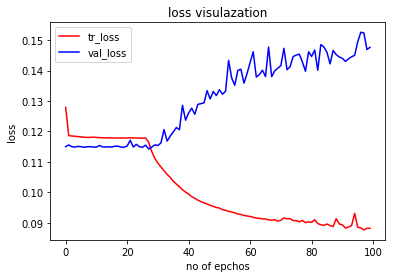

In [56]:
plt.plot(history.history["loss"],color = 'red', label = 'tr_loss')
plt.plot(history.history["val_loss"], color = 'blue', label = 'val_loss')
plt.title('loss visulazation')
plt.xlabel('no of epchos')
plt.ylabel('loss')
plt.legend()
plt.show()

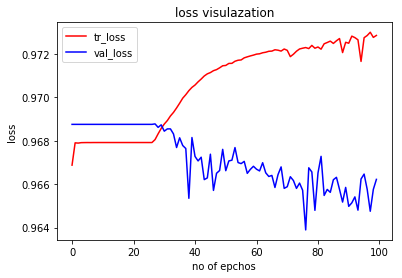

In [57]:
plt.plot(history.history["acc"],color = 'red', label = 'tr_loss')
plt.plot(history.history["val_acc"], color = 'blue', label = 'val_loss')
plt.title('loss visulazation')
plt.xlabel('no of epchos')
plt.ylabel('loss')
plt.legend()
plt.show()

In [55]:
Model.evaluate(X,y)

36380/36380 [==============================] - 91s 3ms/step


[0.11293759172093154, 0.9684068296557274]

In [86]:
y_prd=Model.predict(X)

In [0]:
#y_pred_dupicate=y_pred

In [63]:
import numpy as np

In [64]:
np.max(y_prd[0])

0.6437017

In [88]:
def Make(Y_ped,threshold_define):
    Y_ped[Y_ped>=threshold_define]=1
    Y_ped[Y_ped<threshold_define]=0
    return Y_ped



In [90]:
threshold_define=0.5

In [91]:
Y_pred=Make(y_prd,threshold_define)

In [92]:
from sklearn.metrics import hamming_loss

def metrics(Y_predicted, Y_test):
    totalPrecision = 0
    totalRecall = 0
    totalF1Score = 0
    for i in range(Y_test.shape[0]):
        truePositive = 0
        trueNegative = 0
        falsePositive = 0
        falseNegative = 0
        precision = 0
        recall = 0
        for j in range(Y_test.shape[1]):
            if Y_predicted[i,j] == 1:
                if Y_test[i,j] == 1:
                    truePositive = truePositive + 1
                else:    
                    falsePositive = falsePositive + 1
            else:
                if Y_test[i,j] == 1:
                    falseNegative = falseNegative + 1
                else:
                    trueNegative = trueNegative + 1
        try:
            precision = truePositive/(truePositive + falsePositive)
        except ZeroDivisionError:
            precision = 0              
         
        totalPrecision = totalPrecision + precision
        try:
            recall = truePositive/(truePositive + falseNegative)
        except ZeroDivisionError:
            recall = 0
         
        totalRecall = totalRecall + recall
        try:
            f1Score = 2 * precision * recall / (precision + recall)
        except:
            f1Score = 0
        totalF1Score = totalF1Score + f1Score
         
    avgPrecision = totalPrecision / (Y_test.shape[0])
    avgRecall = totalRecall / (Y_test.shape[0])
    avgF1Score = totalF1Score / (Y_test.shape[0])
    #print("optimizer=Adam,epochs=300,batch_size=32")
    #print("Average Precision : " + str(avgPrecision))
    #print(avgPrecision)
    #print("Average Recall : "  + str (avgRecall))
    #print(avgRecall)
    #print("Average F1-Score : " + str(avgF1Score))
    #print(avgF1Score)
    F1Score = ( 2 * avgPrecision * avgRecall ) / ( avgPrecision + avgRecall )
    #print("F1-score : " + str(F1Score))
    hammingLoss = hamming_loss(Y_predicted, Y_test)
    #print("Hamming Loss : " + str(hammingLoss))
    return avgPrecision, avgRecall, avgF1Score, F1Score, hammingLoss
    #print(classification_report(Y_test ,Y_predicted ))

In [93]:
metrics(y_prd, y)

(0.6372878871174716,
 0.08534947924995784,
 0.13691010504725215,
 0.15053799271743187,
 0.031593167731173336)

In [95]:
from sklearn.metrics import classification_report
print(classification_report(y,y_prd))

/home/nitp/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/nitp/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels.
  'recall', 'true', average, warn_for)


              precision    recall  f1-score   support

           0       0.00      0.00      0.00       231
           1       0.00      0.00      0.00       303
           2       0.00      0.00      0.00       598
           3       0.00      0.00      0.00       872
           4       0.00      0.00      0.00       293
           5       0.00      0.00      0.00       293
           6       0.00      0.00      0.00       293
           7       0.00      0.00      0.00       293
           8       0.00      0.00      0.00       575
           9       0.00      0.00      0.00       635
          10       0.00      0.00      0.00       636
          11       0.00      0.00      0.00       366
          12       0.00      0.00      0.00       261
          13       0.00      0.00      0.00       313
          14       0.00      0.00      0.00       475
          15       0.00      0.00      0.00       311
          16       0.00      0.00      0.00       502
          17       0.00    